In [46]:
import numpy as np 
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns
iris_df = sns.load_dataset('iris')

In [ ]:
## Adaline

class AdalineGD:
    def __init__(self, eta = 0.01, n_iter = 50, random_state=42):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc =0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y-output)

            self.w_ = self.w_ + self.eta*2.0*X.T.dot(errors)/X.shape[0]               #transpose X for dot product compatibility 
            self.b_ = self.b_ + self.eta*2.0*(errors).mean()                         #mean of errors per epoch
            loss = (errors**2).mean()
            self.losses_.append(loss)

        return self


    def net_input(self,X):
        return np.dot(X,self.w_) + self.b_


    def activation(self, net_input):
        return net_input

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


In [23]:
## selecting only two classes setosa and versicolor
df = iris_df[:100]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
y = df['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [ ]:
#encoding classes
y = np.where(y == 'setosa', 0, 1)

In [28]:
#features
X = df.drop(columns='species')
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


COmparing convergence with n=0.1 vs 0.0001

In [43]:
# Train models
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)

Text(0.5, 1.0, 'ADA2 learning rate of 0.001')

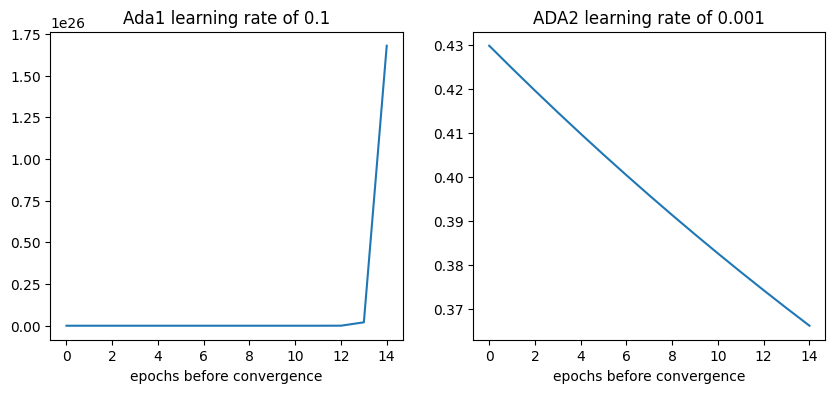

In [53]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(ada1.losses_)
plt.xlabel("epochs before convergence")
plt.title('Ada1 learning rate of 0.1')


plt.subplot(1,2,2)
plt.plot(ada2.losses_)
plt.xlabel("epochs before convergence")
plt.title("ADA2 learning rate of 0.001")

In [57]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


Lets standardize the features and see how many epochs it takes before convergence

In [56]:
X_stan = np.copy(X)
X_stan[:,0] = (X[:,0]-X[:,0].mean())/X[:,0].std()
X_stan[:,1] = (X[:,1]-X[:,1].mean())/X[:,1].std()
X_stan[:,2] = (X[:,2]-X[:,2].mean())/X[:,2].std()
X_stan[:,3] = (X[:,3]-X[:,3].mean())/X[:,3].std()

InvalidIndexError: (slice(None, None, None), 0)